# 透過 SIFT 特徵實作 Brute-Force Matching

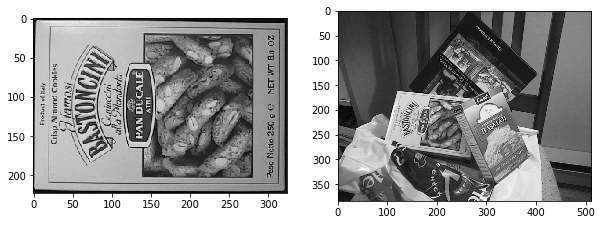

In [25]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline
IMG_PATH = "Part01"

# 以灰階方式讀入圖片
img_query = cv2.imread(os.path.join(IMG_PATH,'box.png'))
img_train = cv2.imread(os.path.join(IMG_PATH,'box_in_scene.png'))

figure = plt.figure(figsize=(10,10))
ax1 = figure.add_subplot(121)
ax1.imshow(img_query)
ax2 = figure.add_subplot(122)
ax2.imshow(img_train)

# 建立 SIFT 物件
sift = cv2.xfeatures2d_SIFT.create()

# 偵測並計算 SIFT 特徵 (keypoints 關鍵點, descriptor 128 維敘述子)
# sift.detectAndComppute(圖像，mask 參數，如果有設定的話可以針對部份圖片計算 SIFT)
kp_query, des_query = sift.detectAndCompute(img_query, None)
kp_train, des_train = sift.detectAndCompute(img_train, None)

## 基於 SIFT 特徵的暴力比對

- D.Lowe ratio test
- knn 比對

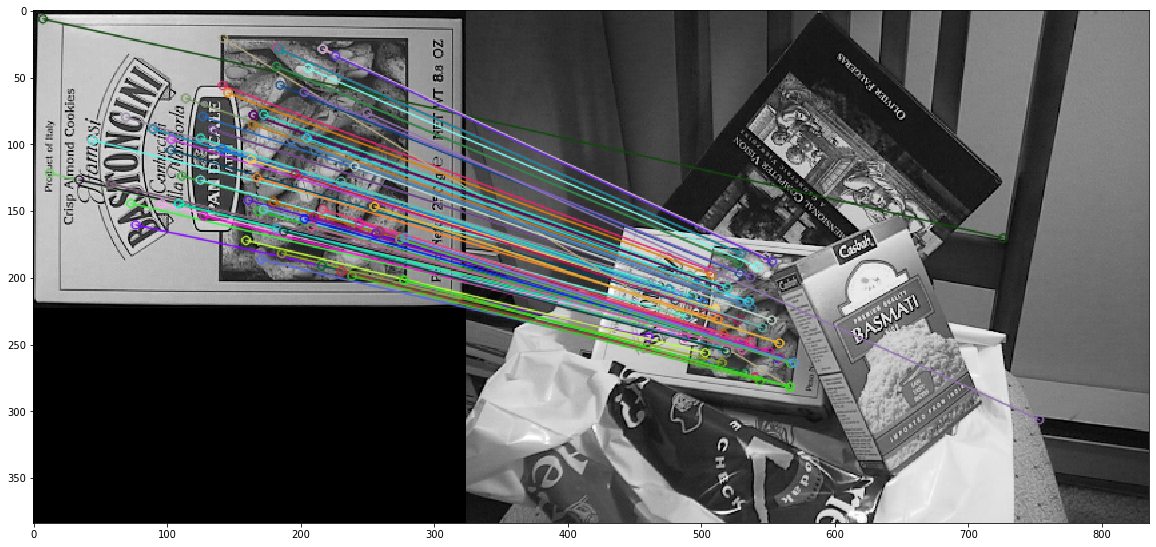

In [24]:
# 建立 Brute-Force Matching 物件
bf = cv2.BFMatcher(cv2.NORM_L2)

# 以 knn 方式暴力比對特徵
matches = bf.knnMatch(des_query, des_train, k=2)

# 透過 D.Lowe ratio test 排除不適合的配對
candidate = []
for m, n in matches:
    if m.distance < 0.75*n.distance:
        candidate.append([m])

# 顯示配對結果
img_show = cv2.drawMatchesKnn(img_query, kp_query, img_train, kp_train, candidate, None, flags=2)
figure = plt.figure(figsize=(20,20))
ax1 = figure.add_subplot(111)
ax1.imshow(img_show)